<a href="https://colab.research.google.com/github/joleentanous/workshop/blob/main/workshop_blendshapes_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Face Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect face landmarks from images.

## Preparation

Let's start with installing MediaPipe.

In [ ]:
!pip install -q mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 11.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


Then download the off-the-shelf model bundle(s). Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/face_landmarker#models) for more information about these model bundles.

In [ ]:
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

## Visualization utilities

In [ ]:
#@markdown We implemented some functions to visualize the face landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

## Download test image

Let's grab a test image that we'll use later. The image is from [Unsplash](https://unsplash.com/photos/mt2fyrdXxzk).

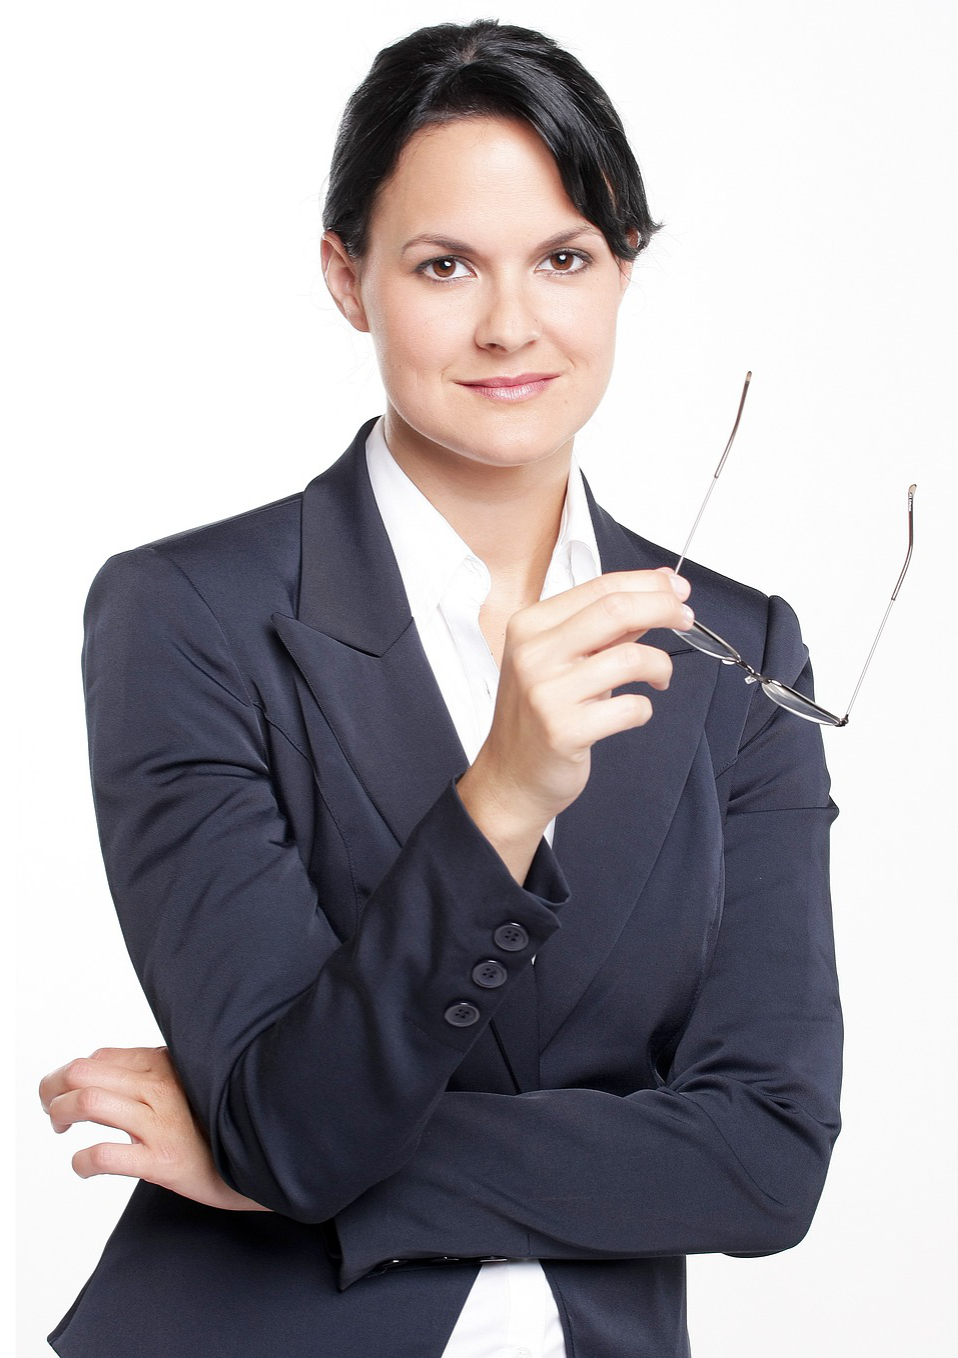

In [ ]:
!wget -q -O image.png https://storage.googleapis.com/mediapipe-assets/business-person.png

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("image.png")
cv2_imshow(img)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [ ]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded:
  content = uploaded[filename]
  with open(filename, 'wb') as f:
    f.write(content)

if len(uploaded.keys()):
  IMAGE_FILE = next(iter(uploaded))
  print('Uploaded file:', IMAGE_FILE)

Saving david.mp4 to david.mp4
Uploaded file: david.mp4


## Running inference and visualizing the results

Here are the steps to run face landmark detection using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/face_landmarker/python) to learn more about configuration options that this task supports.


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


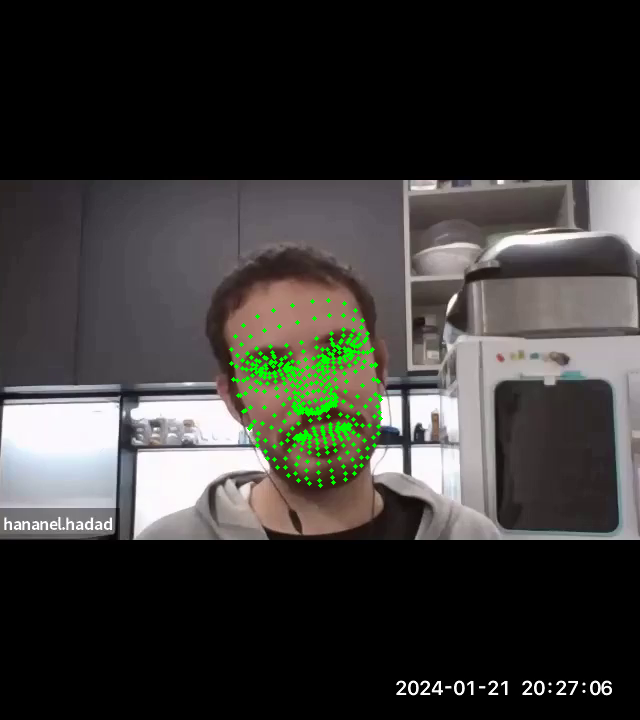

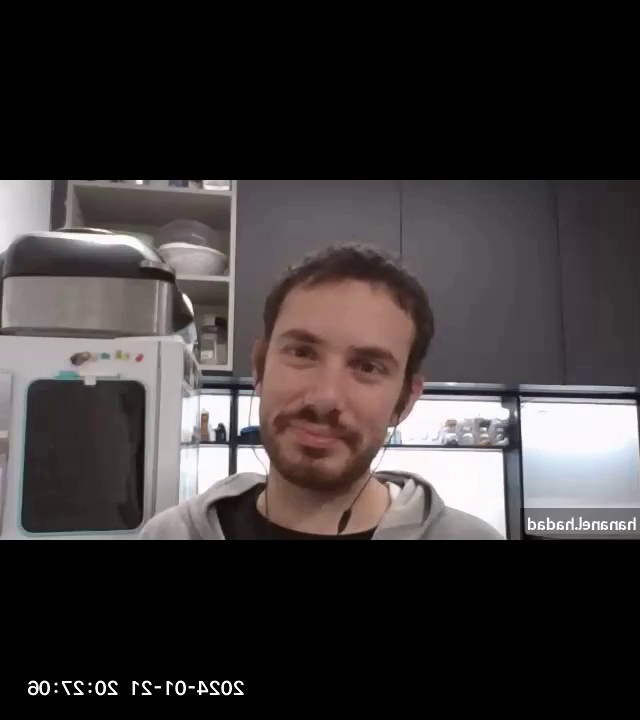

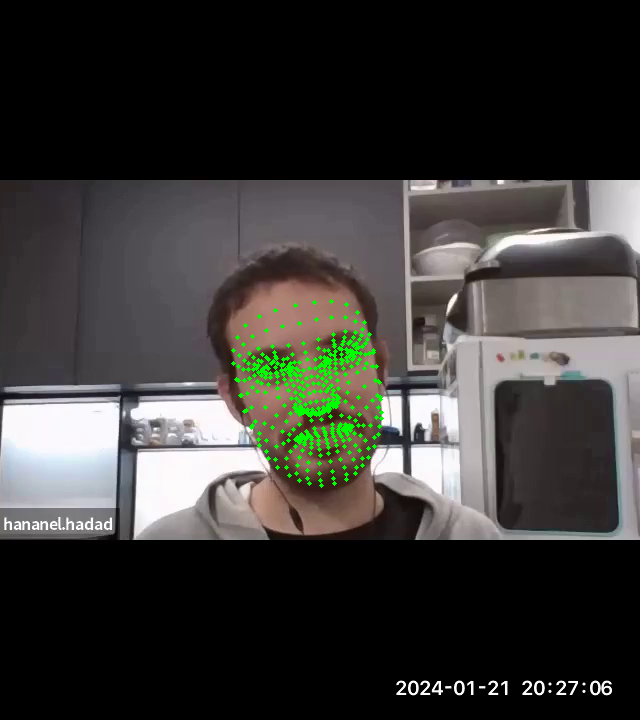

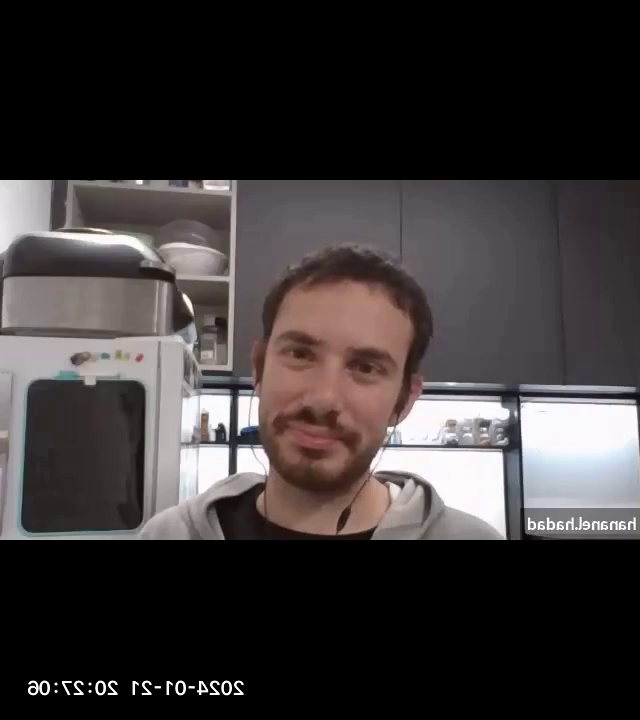

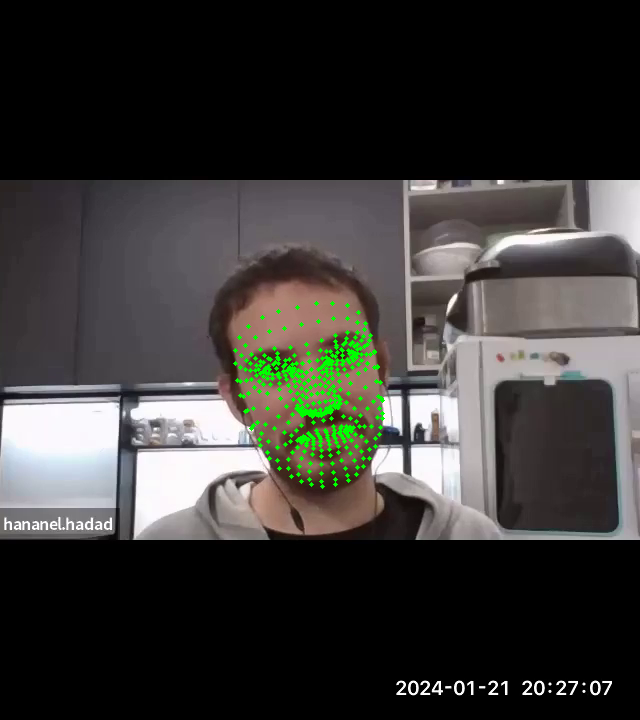

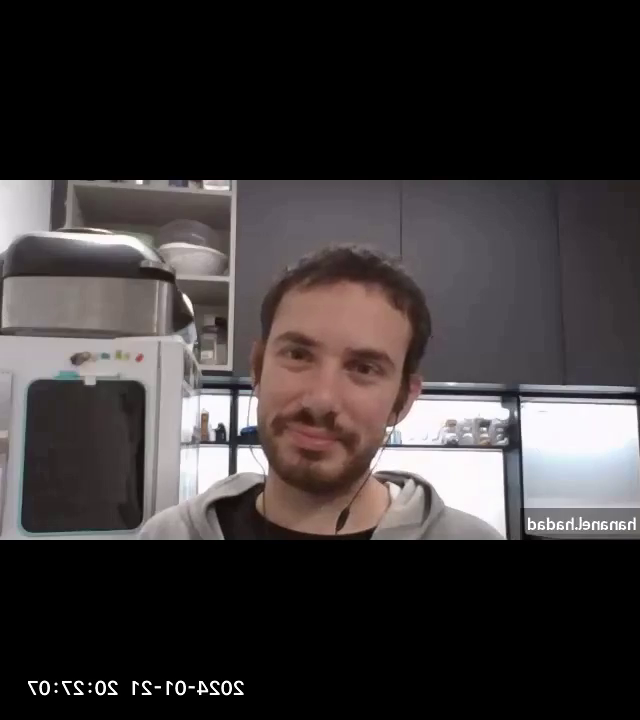

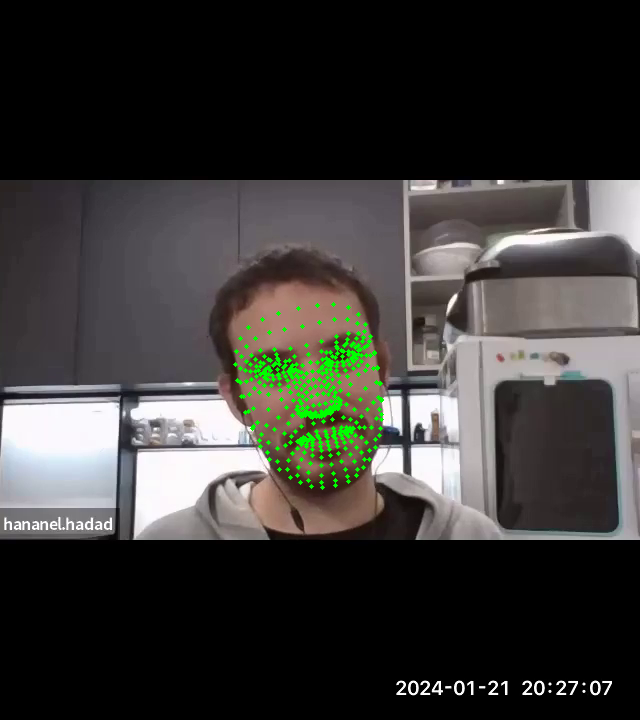

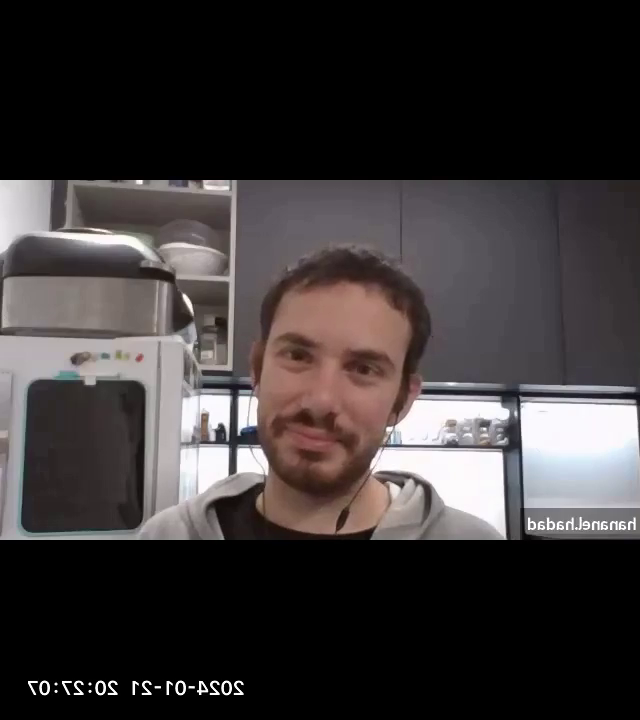

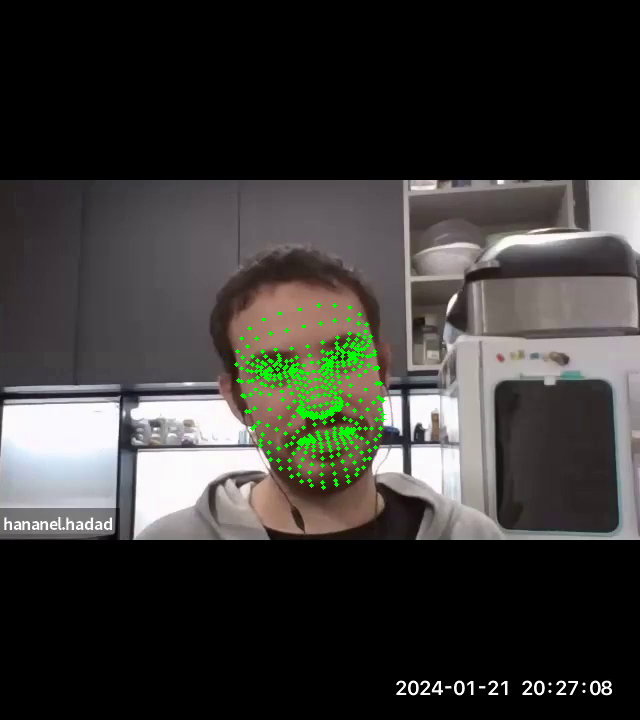

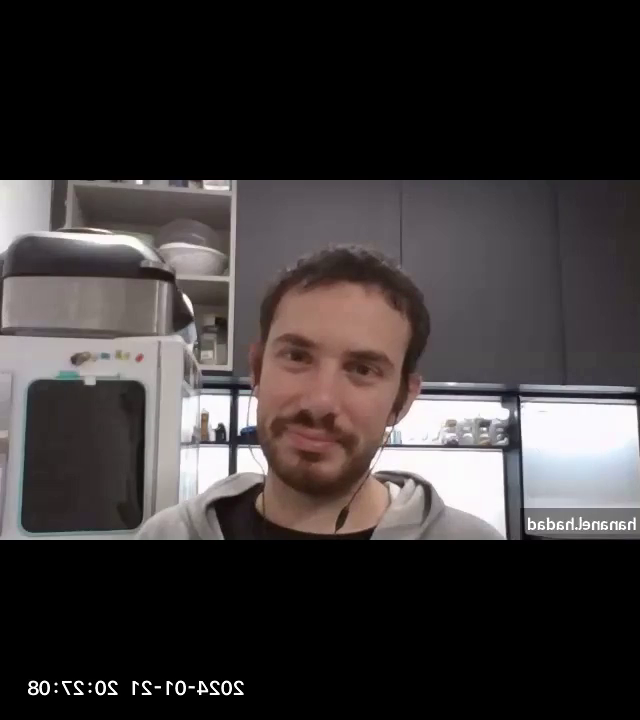

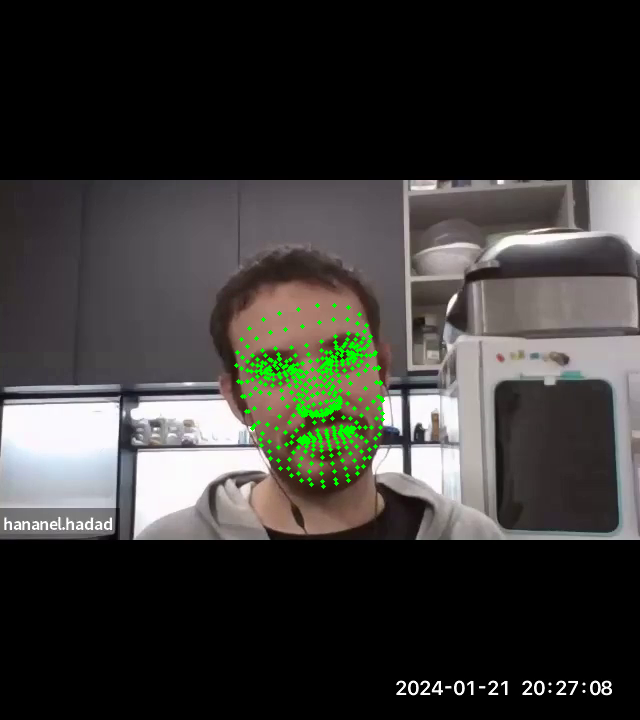

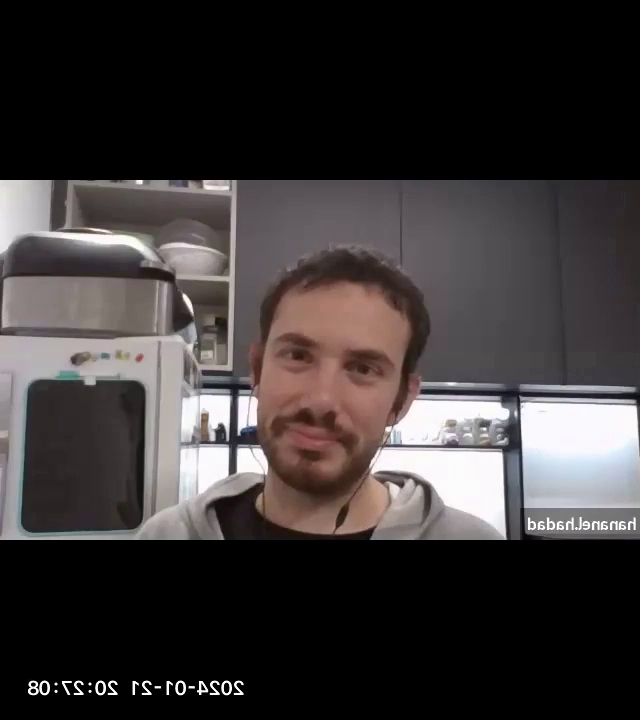

All blendshapes data saved to all_blendshapes_data.xlsx
Facial transformation matrices saved to facial_transformation_matrices.xlsx


In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
from google.colab.patches import cv2_imshow  # Import the Colab patch
import pandas as pd

mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

# Initialize video capture
cap = cv2.VideoCapture("david.mp4")

# Create a FaceLandmarker object
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# Function to draw landmarks on the image
def draw_landmarks_on_image(image, detection_result):
    for face_landmarks in detection_result.face_landmarks:
        for idx, landmark in enumerate(face_landmarks):
            x = int(landmark.x * image.shape[1])
            y = int(landmark.y * image.shape[0])
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
    return image

# Function to plot face blendshapes and return data
def plot_face_blendshapes_bar_graph(face_blendshapes):
    # Implement your plotting function here and return data
    # For example, create a list of tuples (name, value) for each blendshape
    blendshape_data = [(blendshape.category_name, blendshape.score) for blendshape in face_blendshapes]
    return blendshape_data

# Accumulate blendshape data across all frames
all_blendshapes_data = []
transformation_matrices = []

# Initialize MediaPipe FaceMesh
with mp_face_mesh.FaceMesh(
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as face_mesh:

    frame_count = 0
    processed_frames = 0
    max_frames = 6  # Number of frames to process

    while cap.isOpened() and processed_frames < max_frames:
        success, image = cap.read()
        if not success:
            print("End of video")
            break

        if frame_count % 10 == 0:  # Process every 10th frame
            # Convert the image to RGB
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Detect face landmarks from the input image
            mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image_rgb)
            detection_result = detector.detect(mp_image)

            # Process the detection result and visualize it
            if detection_result.face_landmarks:
                annotated_image = draw_landmarks_on_image(image_rgb, detection_result)
                cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

                transformation_matrices.append(detection_result.facial_transformation_matrixes)



                # Plot face blendshapes and extract data
                blendshape_data = plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])
                all_blendshapes_data.append(blendshape_data)

            cv2_imshow(cv2.flip(image, 1))

            if cv2.waitKey(5) & 0xFF == 27:
                break

            processed_frames += 1

        frame_count += 1

# Release the video capture and destroy all windows
cap.release()
cv2.destroyAllWindows()

# Convert accumulated blendshape data into a DataFrame
columns = ['Blendshape', 'Value']
final_blendshapes_data = []
for frame_data in all_blendshapes_data:
    final_blendshapes_data.extend(frame_data)

df = pd.DataFrame(final_blendshapes_data, columns=columns)

# Export blendshape data to Excel
excel_filename = 'all_blendshapes_data.xlsx'
df.to_excel(excel_filename, index=False)
print(f"All blendshapes data saved to {excel_filename}")
df = pd.DataFrame(transformation_matrices)
excel_filename = 'facial_transformation_matrices.xlsx'
df.to_excel(excel_filename, index=False)
print(f"Facial transformation matrices saved to {excel_filename}")


We will also visualize the face blendshapes categories using a bar graph.

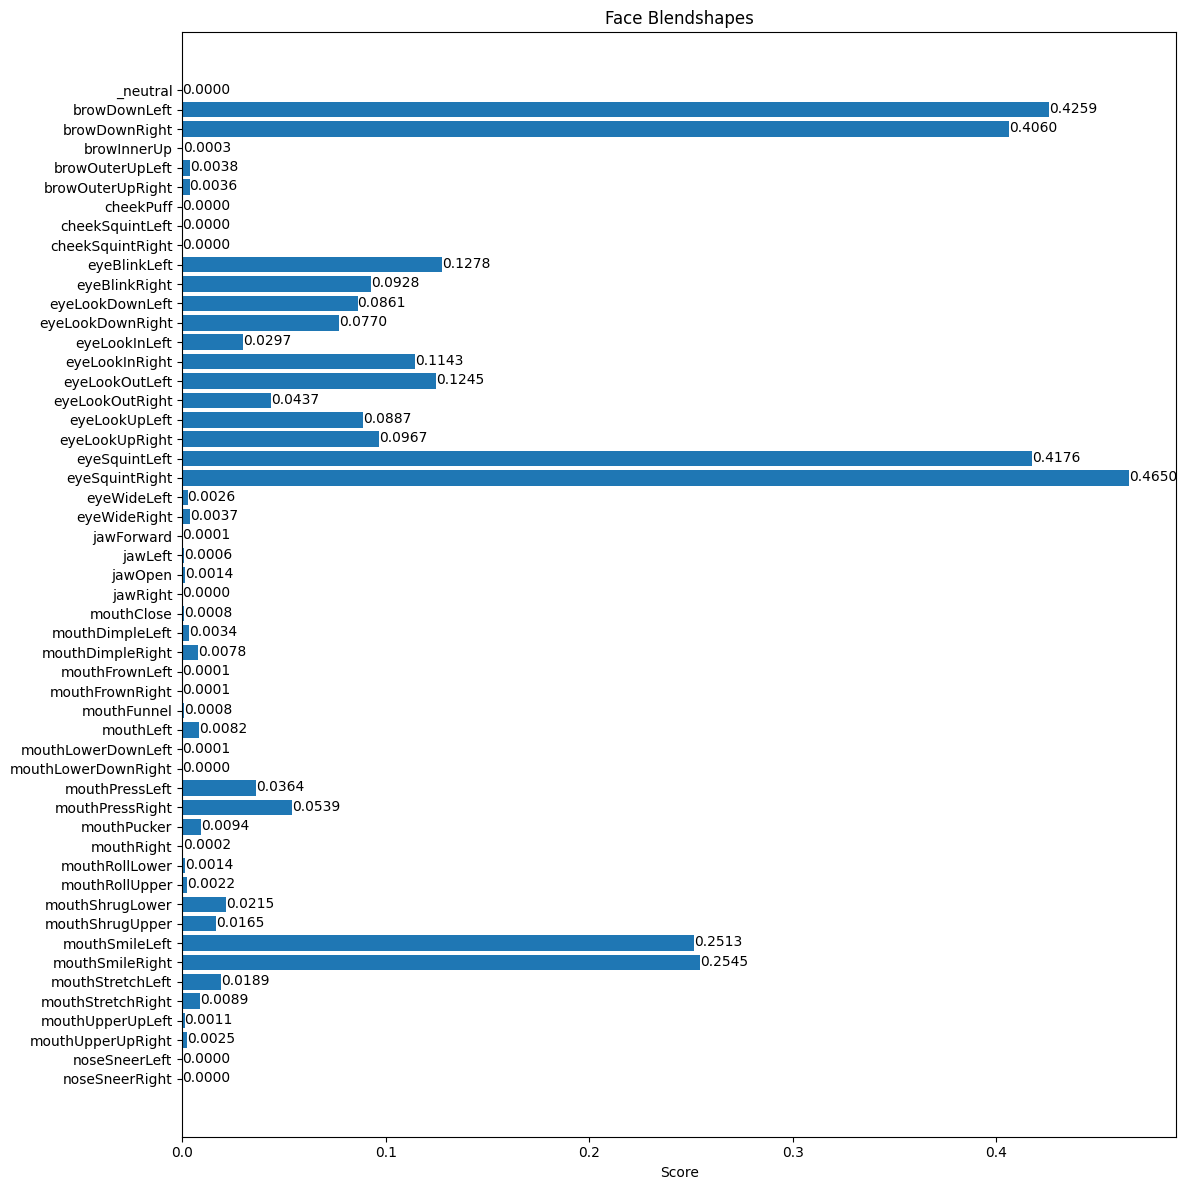

In [ ]:
plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])

And print the transformation matrix.

In [ ]:
print(detection_result.facial_transformation_matrixes)

[array([[ 9.99292016e-01,  2.55983323e-02,  2.75804419e-02,
        -1.26137233e+00],
       [-2.32876632e-02,  9.96436536e-01, -8.10696334e-02,
         1.63243484e+01],
       [-2.95574013e-02,  8.03698897e-02,  9.96327102e-01,
        -6.35286713e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])]
